Load the MNIST Dataset

In [40]:
from sklearn.datasets import fetch_openml

# Load full MNIST (takes time first time)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist['data'], mnist['target']
y = y.astype(int)  # Convert labels to integers


Visualize a Sample Image

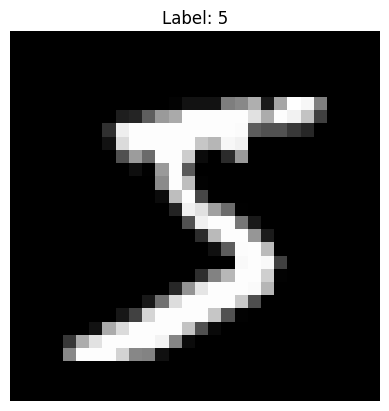

In [41]:
import matplotlib.pyplot as plt

some_digit = X[0].reshape(28, 28)
plt.imshow(some_digit, cmap='gray')
plt.title(f"Label: {y[0]}")
plt.axis('off')
plt.show()


Preprocess the Data

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Choose a Machine Learning Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Make Predictions

In [45]:
y_pred = model.predict(X_test)
print(y_pred)

[8 4 8 ... 2 7 1]


Evaluate the Model

Accuracy: 0.9712142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



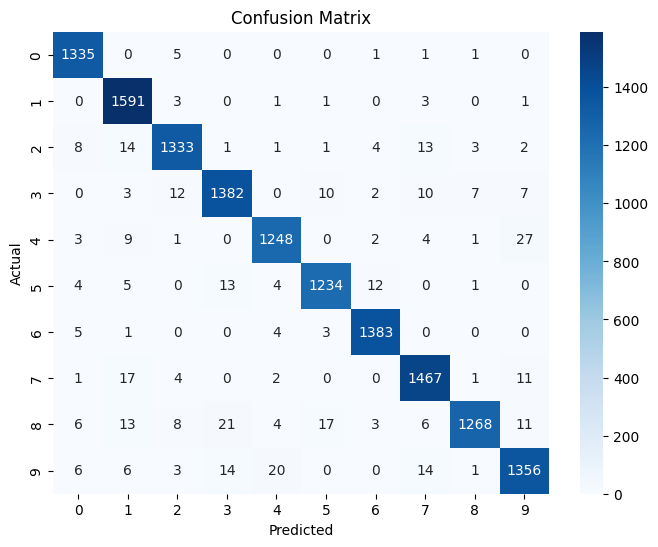

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization (optional)
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Hyperparameter Tuning with GridSearchCV (to achieve >97% result)

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'leaf_size': [20, 30, 40]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

Evaluate

In [48]:
from sklearn.metrics import accuracy_score, classification_report

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Best Params: {grid_search.best_params_}")
print(f"Test Accuracy: {acc:.4f}")

# Classification Report
print(classification_report(y_test, y_pred))

Best Params: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 4, 'weights': 'distance'}
Test Accuracy: 0.9731
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.96      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



Compare Between Different Model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='distance'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

In [57]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")


--- KNN ---
Accuracy: 0.9729
F1 Score: 0.9728
--- Logistic Regression ---
Accuracy: 0.9206
F1 Score: 0.9196
--- Random Forest ---
Accuracy: 0.9677
F1 Score: 0.9676
--- SVM ---
Accuracy: 0.9762
F1 Score: 0.9761


In [58]:
import pandas as pd

summary = pd.DataFrame({
    model: {
        'Accuracy': round(metrics['accuracy'], 4),
        'F1 Score (macro)': round(metrics['f1_score'], 4)
    }
    for model, metrics in results.items()
}).T

print("\nModel Comparison Summary:\n")
print(summary)



Model Comparison Summary:

                     Accuracy  F1 Score (macro)
KNN                    0.9729            0.9728
Logistic Regression    0.9206            0.9196
Random Forest          0.9677            0.9676
SVM                    0.9762            0.9761


Try Other Models (Optional)

Save Your Model (Optional)